# 02806 Social data analysis and visualization

## Assignment 1 

##### Libraries

Importing the libraries:

In [19]:
import os
import urllib.request
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime
import pdb
import json
import plotly.express as px
import calendar
import seaborn as sns

%matplotlib inline

In [2]:
# from IPython.core.display import display, HTML
# display(HTML("<style>div.output_scroll { height: 100em; }</style>"))

### Part 1: Temporal Patterns

**Exercise**: More temporal patterns. During week 1, we plotted some crime development over time (how each of the focus-crimes changed over time, year-by-year).  

In this exercise, please generate the visualizations described below. Use the same date-ranges as in Week 1. For each set of plots, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (a couple of ideas below for things that could be interesting to comment on ... but it's OK to chose something else).

* *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/weekdays.png). Hint for comment: Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?
* *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
* *The 24 hour cycle*. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
* *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.


In [4]:
#Picking the filename to import into a pandas dataframe
fileName = 'Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv'

#Importing the dataset
filePath = os.path.abspath(os.path.join(os.getcwd(), '..' ,'Datasets', fileName))
df = pd.read_csv(filePath)

#Removing the 2018 (since we don't have full data for 2018)
df['Year'] = pd.to_datetime(df['Date']).dt.to_period('Y')
df2 = df[df['Year'] != '2018'].copy() # drop rows corresponding to 2018

#For the exercise below, we look only at the following focus-crimes
focuscrimes = (set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']))

> * **Weekly patterns**. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. Here's what my version looks like. Hint for comment: Some things make sense - for example drunkenness and the weekend. But there are some aspects that were surprising to me. Check out prostitution and mid-week behavior, for example!?

In [4]:
# Order the Day-of-Week column
df2['DayOfWeek'] = pd.Categorical(df2['DayOfWeek'],categories=[
                    'Monday','Tuesday','Wednesday','Thursday',
                    'Friday','Saturday','Sunday'],ordered=True)

focuscrimes_lst = [ 'WEAPON LAWS', 'DRUNKENNESS',
                    'TRESPASS','PROSTITUTION',
                    'DRIVING UNDER THE INFLUENCE','BURGLARY',
                    'ROBBERY','DRUG/NARCOTIC',
                    'LARCENY/THEFT','DISORDERLY CONDUCT',
                    'VANDALISM', 'VEHICLE THEFT',
                    'ASSAULT', 'STOLEN PROPERTY']

focuscrimes_lst.sort()

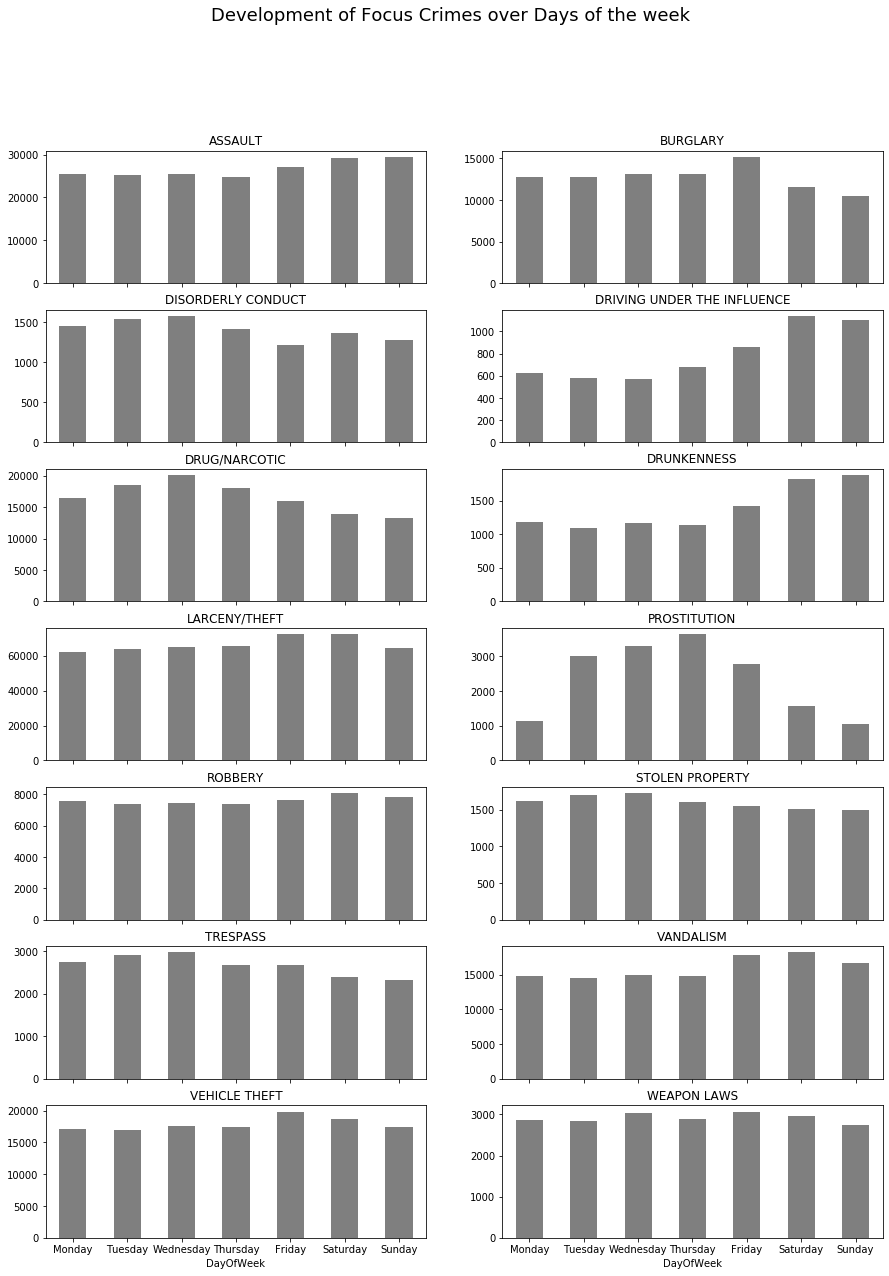

In [5]:
fig, axs = plt.subplots(7, 2,figsize=(15, 20), sharex=True)
fig.suptitle('Development of Focus Crimes over Days of the week', fontsize=18)
group_count = df2.groupby(['Category','DayOfWeek'])['PdId'].count()
for i,ax in enumerate(axs.flat):
    ax.set(title=focuscrimes_lst[i])
    group_count[focuscrimes_lst[i]].plot(kind='bar',ax=ax, rot=0, color= 'tab:gray')

**COMMENTS**

>* **The months**. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?

In [6]:
df2['Month_Numeric'] = pd.to_datetime(df2['Date']).dt.month
df2['Month'] = df2['Month_Numeric'].apply(lambda x: calendar.month_abbr[x])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',  'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec',]
df2['Month'] = pd.Categorical(df2['Month'], categories=months, ordered=True)

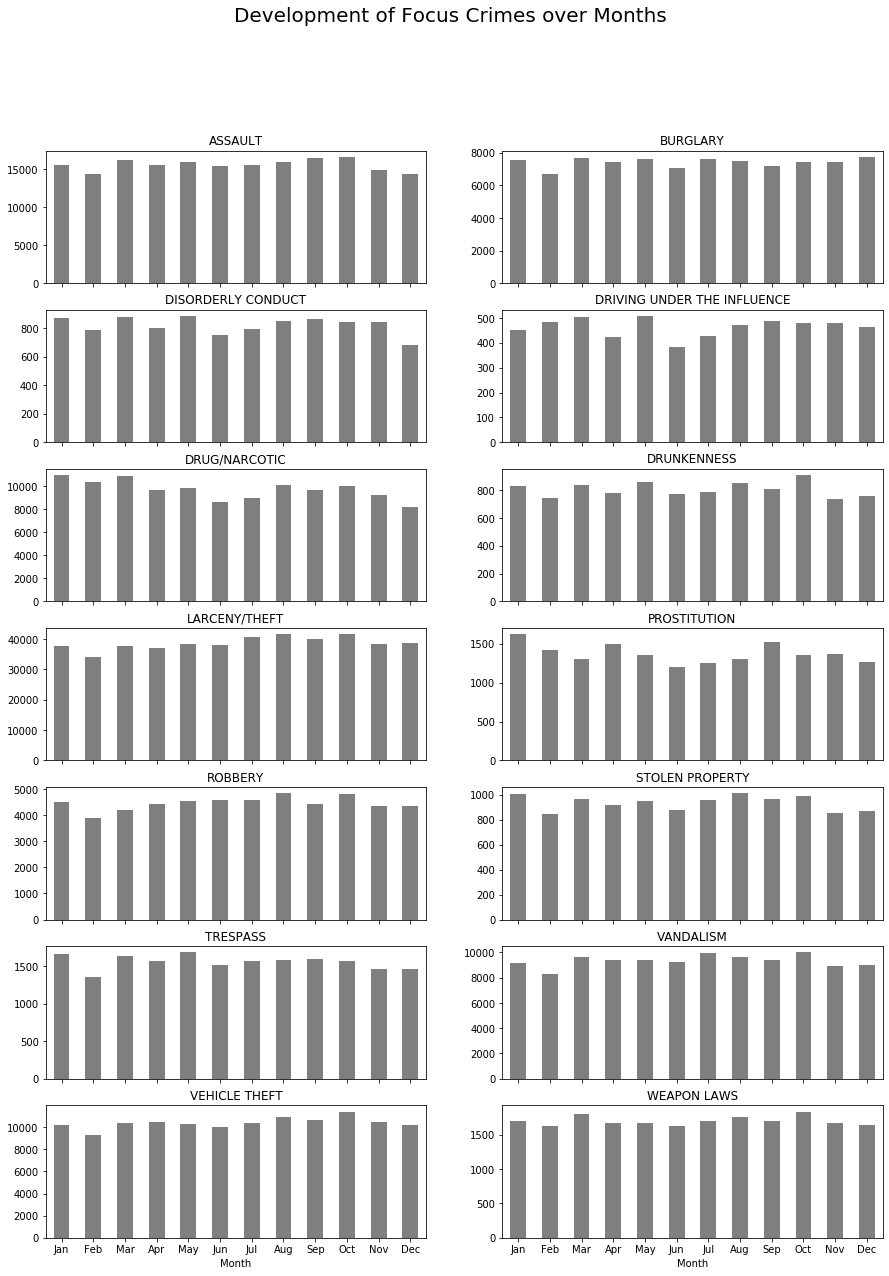

In [8]:
fig, axs = plt.subplots(7, 2,figsize=(15, 20), sharex=True)
fig.suptitle('Development of Focus Crimes over Months', fontsize=20)
group_count = df2.groupby(['Category','Month'])['PdId'].count()
for i,ax in enumerate(axs.flat):
    ax.set(title=focuscrimes_lst[i])
    group_count[focuscrimes_lst[i]].plot(kind='bar',ax=ax, rot=0, color= 'tab:gray')

**COMMNETS**

>* **The 24 hour cycle**. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 

In [11]:
df2['Hour'] = pd.to_datetime(df2['Time']).dt.hour
df2['Hour'] = df2['Hour'].apply(lambda x: str(x)+"-"+str(x+1))
hours = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13',
        '13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24']
df2['Hour'] = pd.Categorical(df2['Hour'], categories=hours, ordered=True)

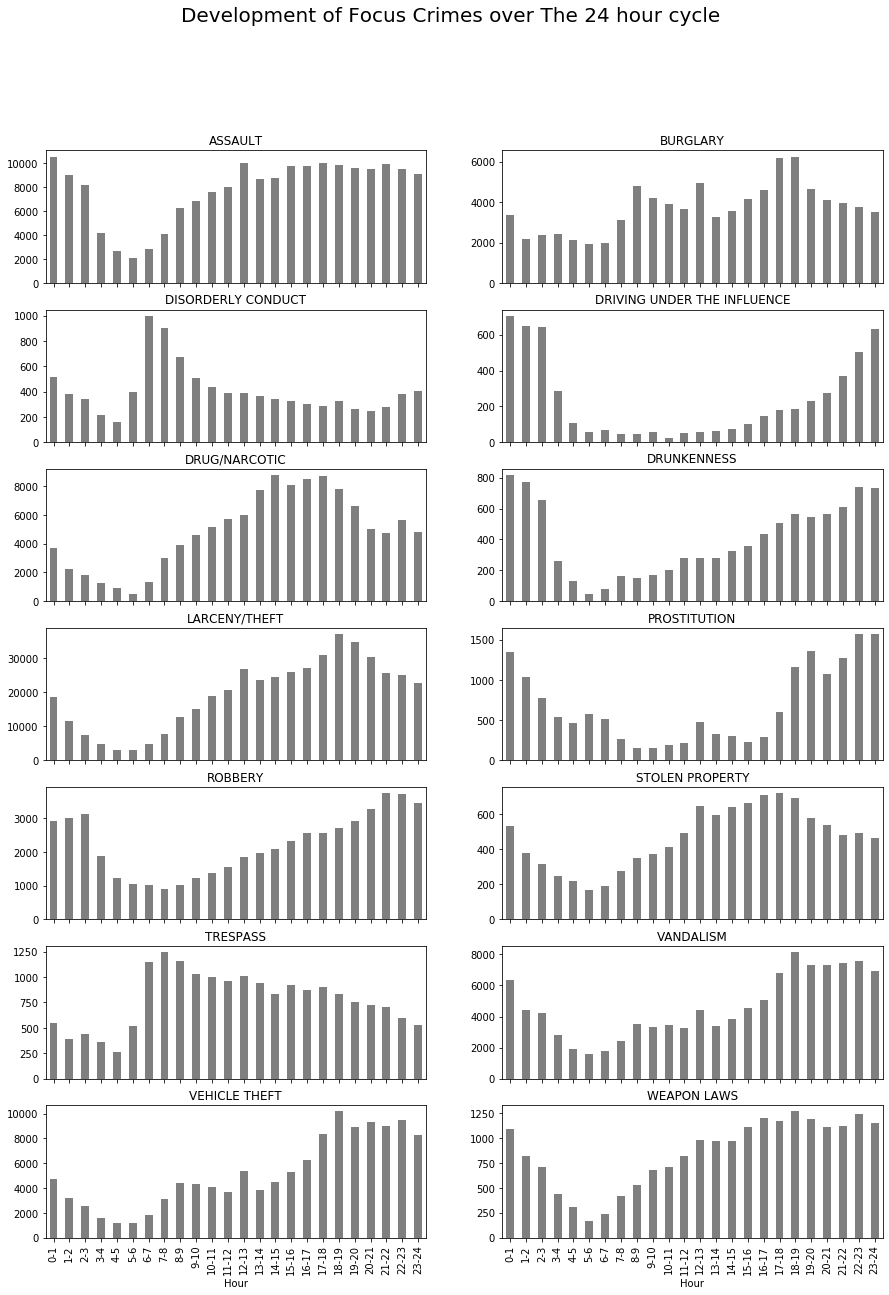

In [13]:
fig, axs = plt.subplots(7, 2,figsize=(15, 20), sharex=True)
fig.suptitle('Development of Focus Crimes over The 24 hour cycle', fontsize=20)
group_count = df2.groupby(['Category','Hour'])['PdId'].count()
for i,ax in enumerate(axs.flat):
    ax.set(title=focuscrimes_lst[i])
    group_count[focuscrimes_lst[i]].plot(kind='bar',ax=ax, color= 'tab:gray')

**COMMENTS**

> * **Hours of the week**. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.


In [14]:
#Function to return the day as a numeric number 1-7 accordingly
def day_to_num(x):
    if(x=='Monday'): return 1
    elif(x=='Tuesday'): return 2
    elif(x=='Wednesday'): return 3
    elif(x=='Thursday'): return 4
    elif(x=='Friday'): return 5
    elif(x=='Saturday'): return 6
    elif(x=='Sunday'): return 7
    else: return -1

#Computing the 168 hours of the week
df2['DayOfWeek_Numeric'] = df2['DayOfWeek'].apply(lambda x : day_to_num(x)).astype('int64')
df2['Hour'] = pd.to_datetime(df2['Time']).dt.hour
h_v   = df2['Hour'].values 
d_v   = df2['DayOfWeek_Numeric'].values
df2['HourOfWeek'] =  (h_v + ((d_v-1)*24) )

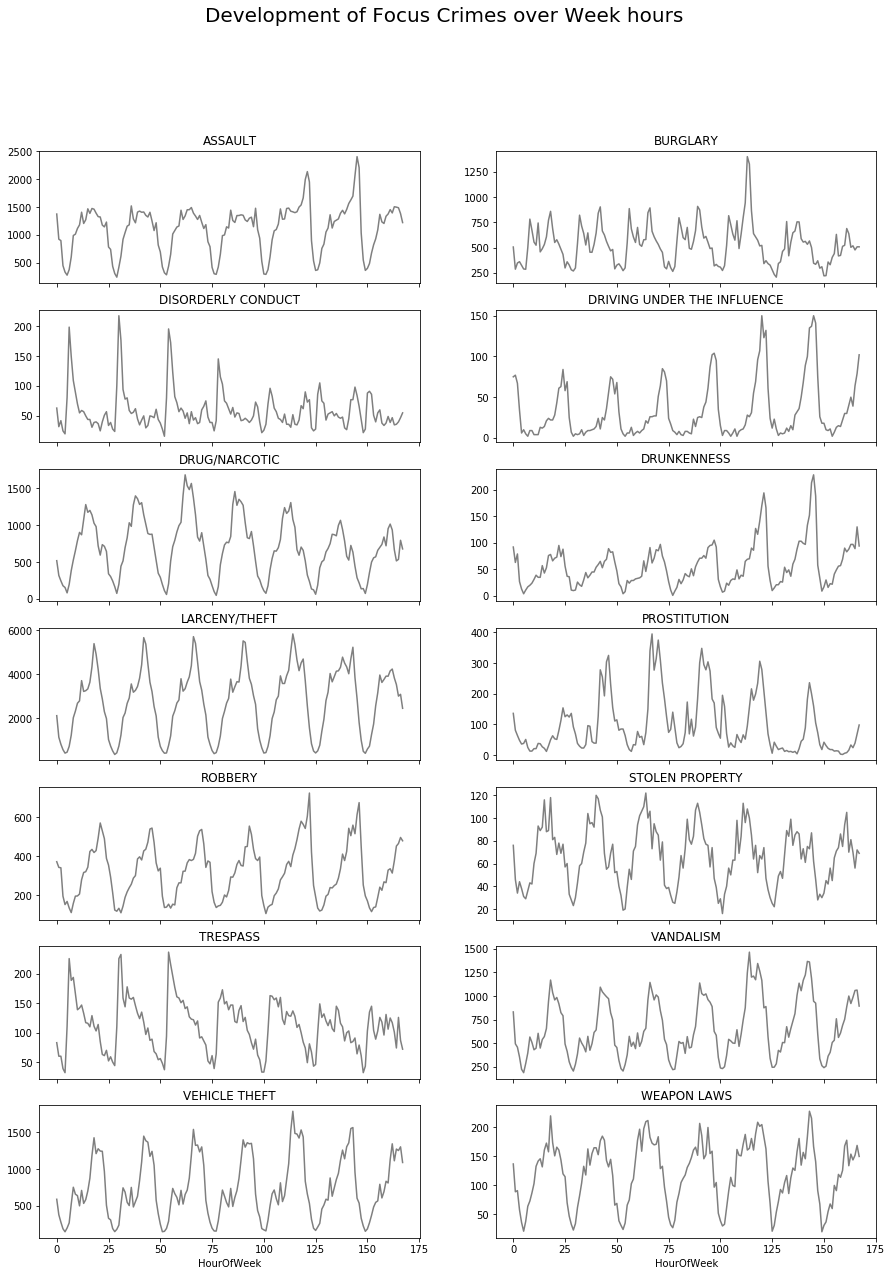

In [16]:
fig, axs = plt.subplots(7, 2,figsize=(15, 20), sharex=True)
fig.suptitle('Development of Focus Crimes over Week hours', fontsize=20)
group_count = df2.groupby(['Category','HourOfWeek'])['PdId'].count()
for i,ax in enumerate(axs.flat):
    ax.set(title=focuscrimes_lst[i])
    group_count[focuscrimes_lst[i]].plot(ax=ax, color= 'tab:gray')

**COMMENTS**

### Part 2: Thinking about data and visualization

**Excercise:** Questions for the [second video lecture](https://www.youtube.com/watch?v=yiU56codNlI).
* As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?
* What is the difference between a bar-chart and a histogram?
* I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. 

> * As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?

This the Pearsons correlation applied for a sample:
$r_{x y}=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}} \sqrt{\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}}}$

An example where visualization works better, instead of a Pearsons correlation, is to detect outliers in the data with the form of visualizing. Removing false values and ourliers, the Pearson correlation will give a greater number (close to 1). 

> * What is the difference between a bar-chart and a histogram?

On the bar-chart, when we have a lot of values in the x-axis, the chart becomes too "crowdy" leaving us unable to draw many insights. To understand better of the trends, we can use a histogram. In histogram we define some bins and we define the number of values we see in those bins.

More into it :
- The Histogram refers to a graphical representation that shows data by way of bars to display the frequency of numerical data whereas the Bar graph is a graphical representation of data that uses bars to compare different categories of data.
- Histogram used for distribution of non-discrete variables while Bar Graph is used for comparison of discrete variables .
- In Histogram, we cannot rearrange the blocks while in Bar Charts, it is common to rearrange the blocks, from highest to lowest.
- Histogram used for displaying the frequency of occurrences and Bar Plots helps you to compare different categories of data.

>* I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. 

One criterion is [Freedman-Diaconis rule](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule). It is designed to minimize the difference between the area under the empirical probability distribution and the area under the theoretical probability distribution.
The general eq. is: 
$\operatorname{Bin}$ width $=2 \frac{\operatorname{IQR}(x)}{\sqrt[3]{n}}$, 
where IQR is the interquartile range of the data and n is the number of observations in the sample $x$.

### Part 3: Generating important plot types

**Excercise**: Let us recreate some plots from DAOST but using our own favorite dataset.

* First, let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

* Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). (I think the GPS data could be fun to understand from this perspective.) 
  * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
  * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 

> * First, let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

C:\Users\astenast\miniconda3\envs\dtu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


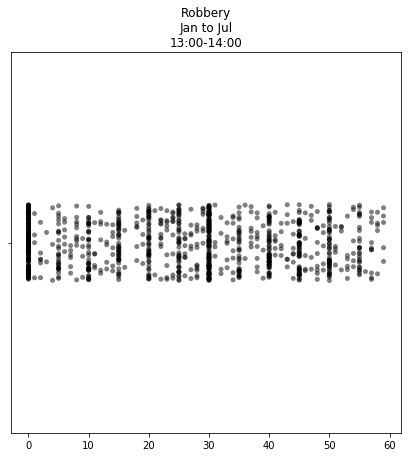

In [21]:
"""
Crime = ROBBERY # imperically: gives one of best figures from Focus Crimes
Month = from Jan to Jul. 
Hour  = 13 - 14  
Time -> Minutes 

Data  = focus crimes & != 2018
"""

data_Jit = df2[df2['Category']=='ROBBERY'] 
data_Jit = data_Jit[data_Jit['Month_Numeric']<=6]
data_Jit = data_Jit[data_Jit['Hour']==13].reset_index(drop=True)
data_Jit['Time'] = pd.to_datetime(data_Jit['Time']).dt.minute


plt.figure(figsize=(7, 7))
sns.stripplot(data_Jit['Time'].values, jitter=True, edgecolor='none', alpha=.50 ,color='k').set_title('Robbery\nJan to Jul\n13:00-14:00')
plt.show()

> * Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). (I think the GPS data could be fun to understand from this perspective.) 
  * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
  * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 

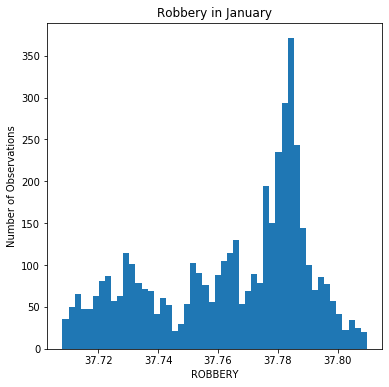

In [22]:
"""
Histogram 01
Crime = ROBBERY
Month = Jan 

Data  = focus crimes & != 2018
"""

data_hist1 = df2[df2['Category'] == 'ROBBERY']
data_hist1 = data_hist1[data_hist1['Month_Numeric']==1]

plt.figure(figsize=(6, 6))
plt.hist(data_hist1['Y'], bins=50) # uses numpy.histogram
plt.title("Robbery in January")
plt.xlabel("ROBBERY")
plt.ylabel("Number of Observations")
plt.show()                                                       

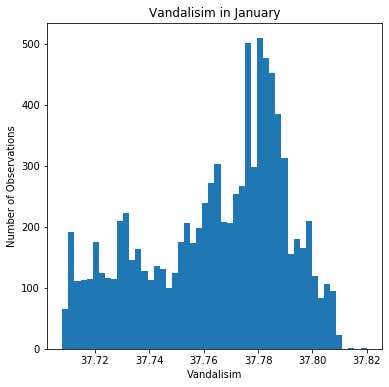

In [24]:
"""
Histogram 01
Crime = VANDALISM 
Month = Jan 

Data  = focus crimes & != 2018
"""
data_hist2 = df2[df2['Category'] == 'VANDALISM']
data_hist2 = data_hist2[data_hist2['Month_Numeric']==1]

plt.figure(figsize=(6, 6))
plt.hist(data_hist2['Y'], bins=50) # uses numpy.histogram
plt.title("Vandalisim in January")
plt.xlabel("Vandalisim")
plt.ylabel("Number of Observations")
plt.show()    

### Part 4: A bit of geo-data

#### 4.1: Create a *Folium* map instance for the city of San Francisco and add a marker for the City Hall coordinates.

In [5]:
# Create New Map Instance
mapSF1 = folium.Map(
    location = [37.7749, -122.4194],
    tiles = 'Stamen Toner',
    zoom_start = 13)

# Add Marker for the City Hall to Map
folium.Marker([37.77919, -122.41914],
              popup='City Hall',
              icon=folium.Icon(color='blue',
                            icon='university',
                            prefix='fa')).add_to(mapSF1)

# Display Map
mapSF1

#### 4.2: Visualize selected crime incidents for a time period of interest.

In [6]:
#==============INPUT VARIABLES=====================
crime = 'DRUG/NARCOTIC'     # pick a crime category
start_date = '2015-06-01'   # format: yyyy-mm-dd
end_date = '2015-07-01'     # format: yyyy-mm-dd
#==================================================

# Create a filtered dataframe based on new preferences
df['Date'] = pd.to_datetime(df['Date'])
df2Map = df.loc[(df['Date'] >= start_date)
                &(df['Date'] <= end_date)
                &(df['Category']==crime)].copy()

# Create New Map instance
mapSF2 = folium.Map(
    location = [37.7749, -122.4194],
    tiles = 'Stamen Toner',
    zoom_start = 12)

# Add Makers to the map (based on preferences from above)
for i, row in df2Map.iterrows():
    folium.CircleMarker([row['Y'], row['X']],
                        radius=1,
                        popup=row['Date'].date(),
                        color='red').add_to(mapSF2)
mapSF2

### Part 5: Errors in the data. The importance of looking at raw (or close to raw) data.